# Artificial Neural Networks

## Summary

- History
- Neural networks fundamentals
- Training neural networks
- Neural networks in action
- Tuning neural networks

## History

### The origins

- 1943 : first mathematical model of a biological neuron (McCulloch & Pitts).
- 1949 : Hebb's rule.
- 1958 : The perceptron (F. Rosenblatt).
- 1969 : Limits of perceptrons (M. Minsky).

### A biological inspiration

![Neuron](images/neuron.png)

### McCulloch & Pitts' formal neuron

![Formal neuron model](images/neuron_model.jpeg)

### Hebb's rule

Attempt to explain synaptic plasticity, the adaptation of brain neurons during the learning process.

> "The general idea is an old one, that any two cells or systems of cells that are repeatedly active at the same time will tend to become 'associated' so that activity in one facilitates activity in the other."

### Franck Rosenblatt's perceptron

![The Perceptron](images/Perceptron.jpg)

### The perceptron learning algorithm

1. Init randomly the $\theta$ connection weights.
1. For each training sample $x^{(i)}$:
    1. Compute the perceptron output $y'^{(i)}$
    1. Adjust weights : $\theta_{next} = \theta + \eta (y^{(i)} - y'^{(i)}) x^{(i)}$

### The MultiLayer Perceptron (MLP)

![MultiLayer Perceptron](images/neural_net2.jpeg)

### Minsky's critic

One perceptron cannot learn non-linearly separable functions.

![XOR problem](images/xor.png)

At the time, no learning algorithm existed for training the hidden layers of a MLP.

### Decisive breakthroughs

- 1974 : Backpropagation theory (P. Werbos).
- 1986 : Learning through backpropagation (Rumelhart, Hinton, Williams).
- 1991 : Universal approximation theorem (Hornik, Stinchcombe, White).
- 1989 : first researchs on deep neural nets (LeCun, Bengio).

### The Deep Learning tsunami

- 2012 : AlexNet (Krizhevsky, Sutskever, Hinton) wins the ImageNet competition.
- 2016 : AlphaGo (DeepMind) beats Go master Lee Sedol by 4 victories to 1.
- 2017 : AlphaZero reaches a surhuman level at Go and chess in less than 24 hours.
- ...

## Neural networks fundamentals

### Anatomy of a network

![A neural network](images/nn_weights.png)

### Neuron output

![Neuron output](images/neuron_output.png)

### Activation functions

- Applied to the weighted sum of neuron inputs to produce its output.
- Always non-linear. If not, the whole network could only apply a linear transformation to its inputs and couldn't solve complex problems.
- The main ones are:
  - **sigmoid** (*logistic function*)
  - **tanh** (*hyberbolic tangent*)
  - **ReLU** (*Rectified Linear Unit*)
  
$$\sigma(z) = \frac{1}{1 + e^{-z}}\;\;\;\;
tanh(z) = 2\sigma(2z) - 1\;\;\;\;
ReLU(z) = max(0,z)$$


### Environment setup

In [1]:
import platform

print(f"Python version: {platform.python_version()}")
assert platform.python_version_tuple() >= ("3", "6")

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd

Python version: 3.7.5


In [2]:
# Setup plots
%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [3]:
# Define activation functions


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def tanh(z):
    return 2 * sigmoid(2 * z) - 1


def relu(z):
    return np.maximum(0, z)

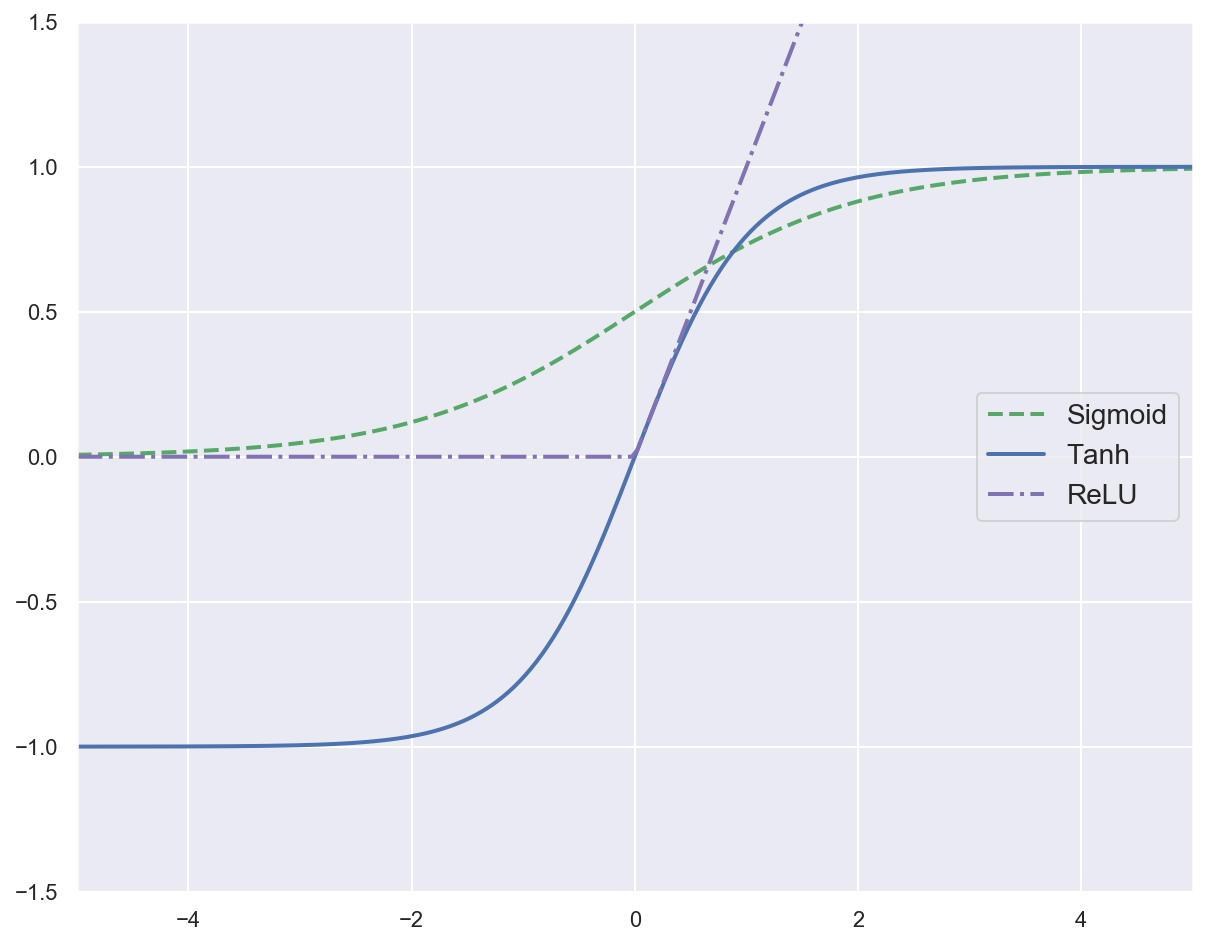

In [4]:
# Plot activation functions
z = np.linspace(-5, 5, 200)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.legend(loc="right", fontsize=14)
plt.axis([-5, 5, -1.5, 1.5])
plt.show()

### Single neuron classifier

Equivalent to logistic regression.

$$\mathcal{L}(\boldsymbol{\pmb{\theta}}) = -\frac{1}{m}\sum_{i=1}^m \left(y^{(i)} \log_e(y'^{(i)}) + (1-y^{(i)}) \log_e(1-y'^{(i)})\right)$$

![Neural classifier](images/neural_classifier.png)

### Single layer multiclass classifier

Equivalent to softmax regression.

$$\sigma(z_j) = \frac{e^{z_j}}{\sum_{k=1}^K {e^{z_k}}}\;\;\;\;
\mathcal{L}(\boldsymbol{\pmb{\theta}}) = -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^K y^{(i)}_k \log_e(y'^{(i)}_k)$$

![Multiclass neural classifier](images/multiclass_neural_classifier.png)

### Universal approximation theorem (1991)

- The hidden layers of a neural network transform their input space.
- A network can be seen as a series of non-linear compositions applied to the input data.
- Given appropriate complexity and appropriate learning, a network can theorically approximate any continuous function.
- One of the most important theoretical results for neural networks.


## Training neural networks

### Training and inference

![Training and inference](images/training_inference1.png)

### Learning algorithm

[![Extract from the book Deep Learning with Python](images/nn_learning.jpg)](https://www.manning.com/books/deep-learning-with-python)

### Weights initialization

To facilitate training, initial weights must be:

- non-zero
- random
- have small values

[Several techniques exist](https://towardsdatascience.com/weight-initialization-in-neural-networks-a-journey-from-the-basics-to-kaiming-954fb9b47c79). A commonly used one is [Xavier initialization](http://jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf).

### Vectorization of computations

![NN matrixes](images/nn_matrixes.png)

#### Hidden layer 1 output

![Layer 1 output](images/output_layer1.png)

#### Hidden layer 2 output

![Layer 2 output](images/output_layer2.png)

#### Output layer result

![Layer 3 output](images/output_layer3.png)

### Weights update

Objective: minimize the loss function that computes the distance between expected and actual results.

Method : gradient descent.

$$\pmb{\theta_{next}} = \pmb{\theta} - \eta\nabla_{\boldsymbol{\theta}}\mathcal{L}(\boldsymbol{\theta})$$

### Neural networks as computational graphs

![Neural networks as computational graphs](images/nn_computational_graph.png)

### Backpropagation

Objective: compute $\nabla_{\boldsymbol{\theta}}\mathcal{L}(\boldsymbol{\theta})$, the loss function gradient w.r.t. all the network weights.

Method: apply the [chain rule](https://en.wikipedia.org/wiki/Chain_rule) to compute partial derivatives backwards, starting from the current output.

$$y = f(g(x)) \;\;\;\; \frac{\partial y}{\partial x} = \frac{\partial f}{\partial g} \frac{\partial g}{\partial x}\;\;\;\; \frac{\partial y}{\partial x} = \sum_{i=1}^n \frac{\partial f}{\partial g^{(i)}} \frac{\partial g^{(i)}}{\partial x}$$

### Visual demo of backpropagation

[![Backprop explained visually](images/visual_backprop_demo.png)](https://developers-dot-devsite-v2-prod.appspot.com/machine-learning/crash-course/backprop-scroll)

### Interactive recap

[![Neural networks playground](images/nn_playground.png)](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=2&seed=0.73591&showTestData=false&discretize=false&percTrainData=80&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&showTestData_hide=true&discretize_hide=true&regularization_hide=true&dataset_hide=false&batchSize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&numHiddenLayers_hide=false&problem_hide=true&noise_hide=false)

## Neural networks in action

### Environment setup

The following examples use [Keras](https://keras.io), a user-friendly neural networks API built on top of [TensorFlow](https://www.tensorflow.org/), Google's Machine Learning platform.

In [5]:
import sklearn

print(f"scikit-learn version: {sklearn.__version__}")

from sklearn.datasets import make_moons, make_circles

import tensorflow as tf

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist, imdb
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

scikit-learn version: 0.22.1
TensorFlow version: 2.0.0
Keras version: 2.2.4-tf


In [6]:
# Utility functions

def plot_planar_data(X, y):
    """Plot some 2D data"""

    plt.figure()
    plt.plot(X[y == 0, 0], X[y == 0, 1], "or", alpha=0.5, label=0)
    plt.plot(X[y == 1, 0], X[y == 1, 1], "ob", alpha=0.5, label=1)
    plt.legend()


def plot_decision_boundary(pred_func, X, y, figure=None):
    """Plot a decision boundary"""

    if figure is None:  # If no figure is given, create a new one
        plt.figure()
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)


def plot_loss_acc(history):
    """Plot training and (optionally) validation loss and accuracy
    Takes a Keras History object as parameter"""

    loss = history.history["loss"]
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 10))

    plt.subplot(2, 1, 1)
    plt.plot(epochs, loss, ".--", label="Training loss")
    final_loss = loss[-1]
    title = "Training loss: {:.4f}".format(final_loss)
    plt.ylabel("Loss")
    if "val_loss" in history.history:
        val_loss = history.history["val_loss"]
        plt.plot(epochs, val_loss, "o-", label="Validation loss")
        final_val_loss = val_loss[-1]
        title += ", Validation loss: {:.4f}".format(final_val_loss)
    plt.title(title)
    plt.legend()

    acc = history.history["accuracy"]

    plt.subplot(2, 1, 2)
    plt.plot(epochs, acc, ".--", label="Training acc")
    final_acc = acc[-1]
    title = "Training accuracy: {:.2f}%".format(final_acc * 100)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    if "val_accuracy" in history.history:
        val_acc = history.history["val_accuracy"]
        plt.plot(epochs, val_acc, "o-", label="Validation acc")
        final_val_acc = val_acc[-1]
        title += ", Validation accuracy: {:.2f}%".format(final_val_acc * 100)
    plt.title(title)
    plt.legend()

### Example: training a binary classifier on moon-shaped data

(Inspired by the article [Applied Deep Learning - Part 1: Artificial Neural Networks](https://towardsdatascience.com/applied-deep-learning-part-1-artificial-neural-networks-d7834f67a4f6))

x_train: (1000, 2). y_train: (1000,)


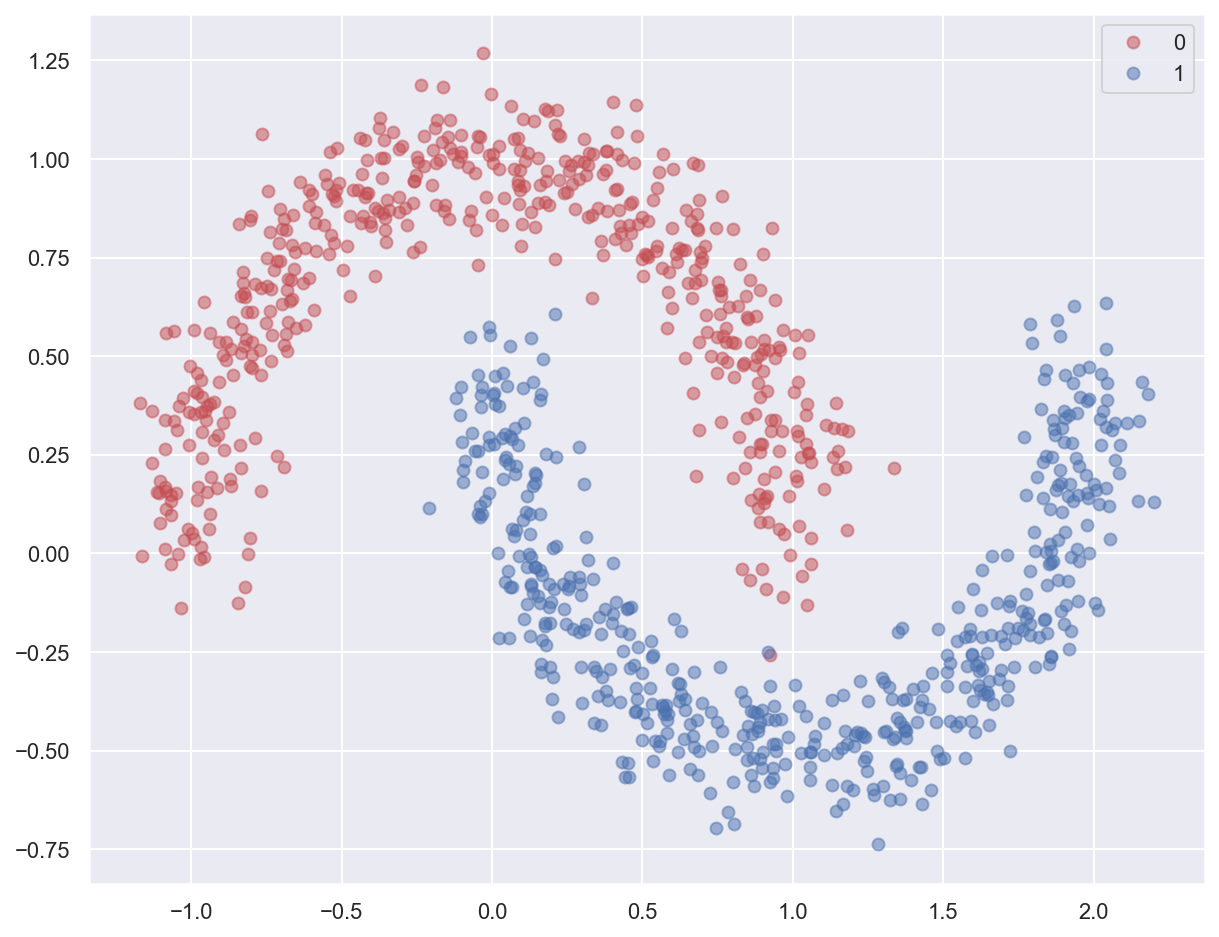

In [7]:
# Generate moon-shaped, non-linearly separable data
x_train, y_train = make_moons(n_samples=1000, noise=0.10, random_state=0)

print(f"x_train: {x_train.shape}. y_train: {y_train.shape}")
plot_planar_data(x_train, y_train)

In [8]:
# Create a new neural network as a linear stack of layers (other architectures exist)
model = Sequential()

# Add a 3-neurons hidden layer using tanh as activation function
model.add(Dense(3, activation="tanh", input_shape=(2,)))

# Add a 1-neuron output layer using sigmoid as activation function
model.add(Dense(1, activation="sigmoid"))

# Describe the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Configuration of the training process
model.compile(
    optimizer=SGD(learning_rate=1.0), loss="binary_crossentropy", metrics=["accuracy"]
)

# Launch the training of the network on the data
history = model.fit(x_train, y_train, verbose=0, epochs=40, batch_size=32)

In [10]:
# Compute the loss & metrics values for the trained network
loss, acc = model.evaluate(x_train, y_train, verbose=0)

print(f"Training loss: {loss:.05f}")
print(f"Training accuracy: {acc:.05f}")

Training loss: 0.00958
Training accuracy: 0.99900


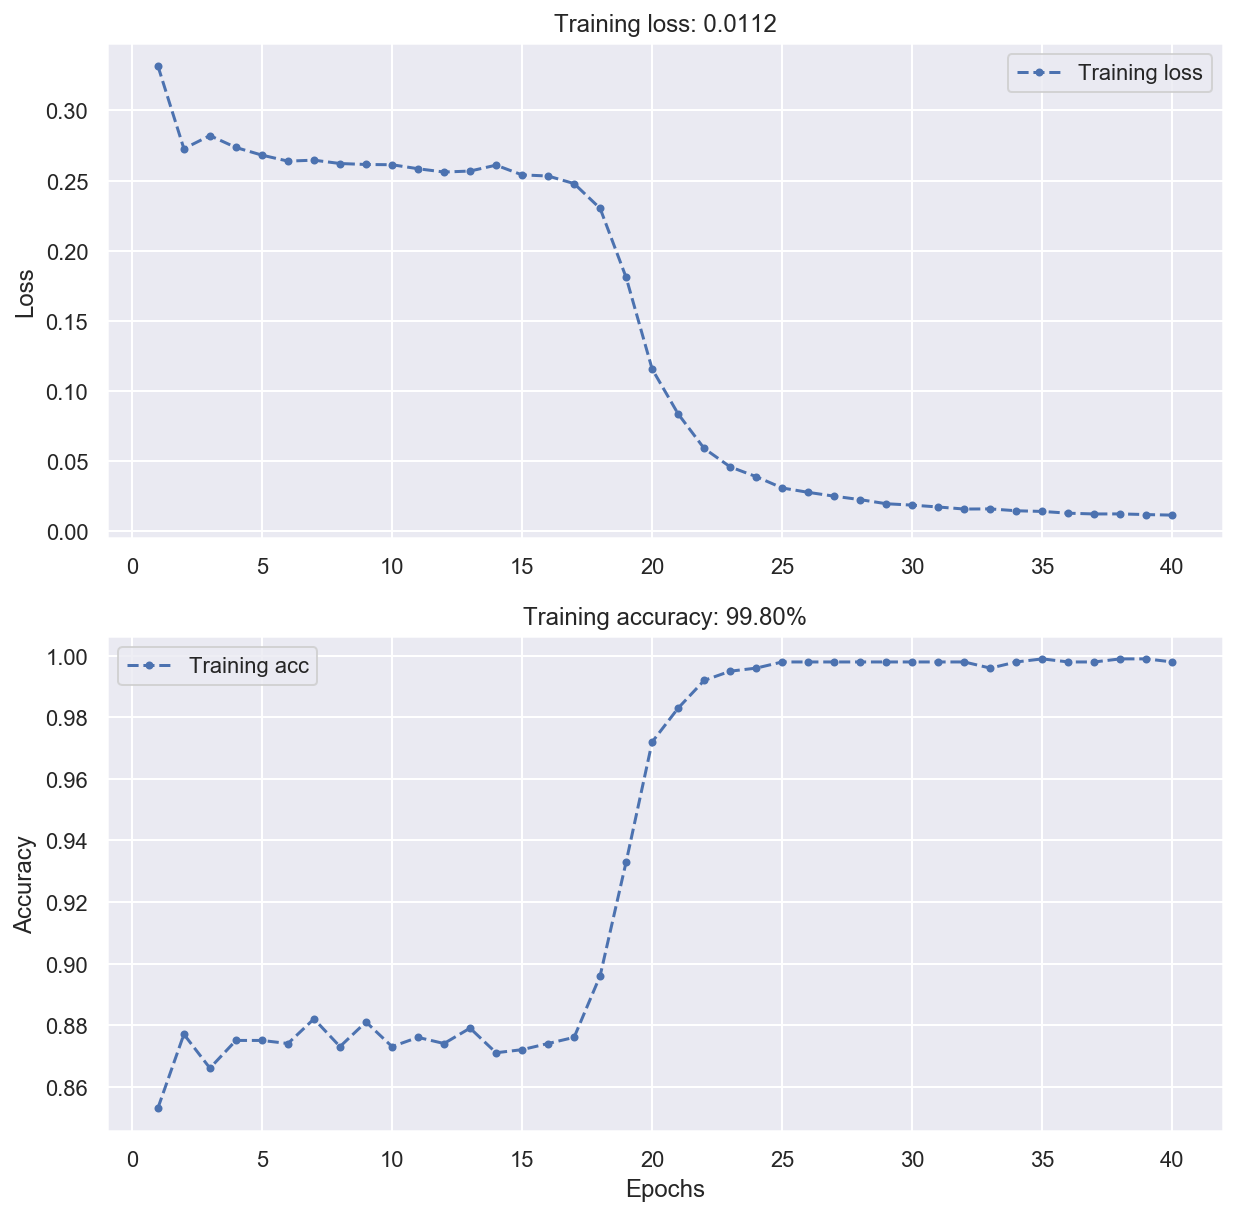

In [11]:
# Plot training metrics
plot_loss_acc(history)

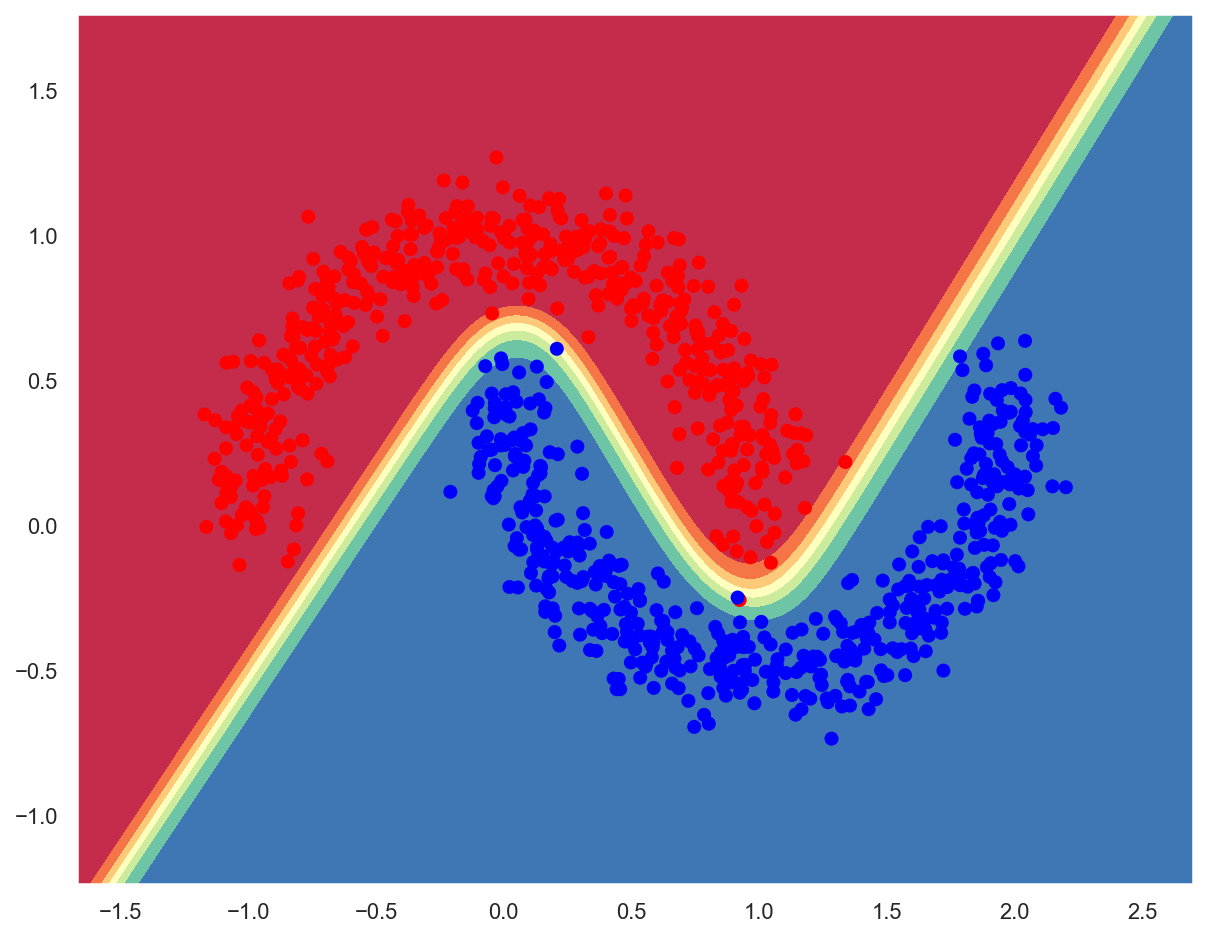

In [12]:
# Plot frontier between predicted classes
plot_decision_boundary(lambda x: model.predict(x), x_train, y_train)

### Example: training a binary classifier on circle-shaped data

x_train: (1000, 2). y_train: (1000,)


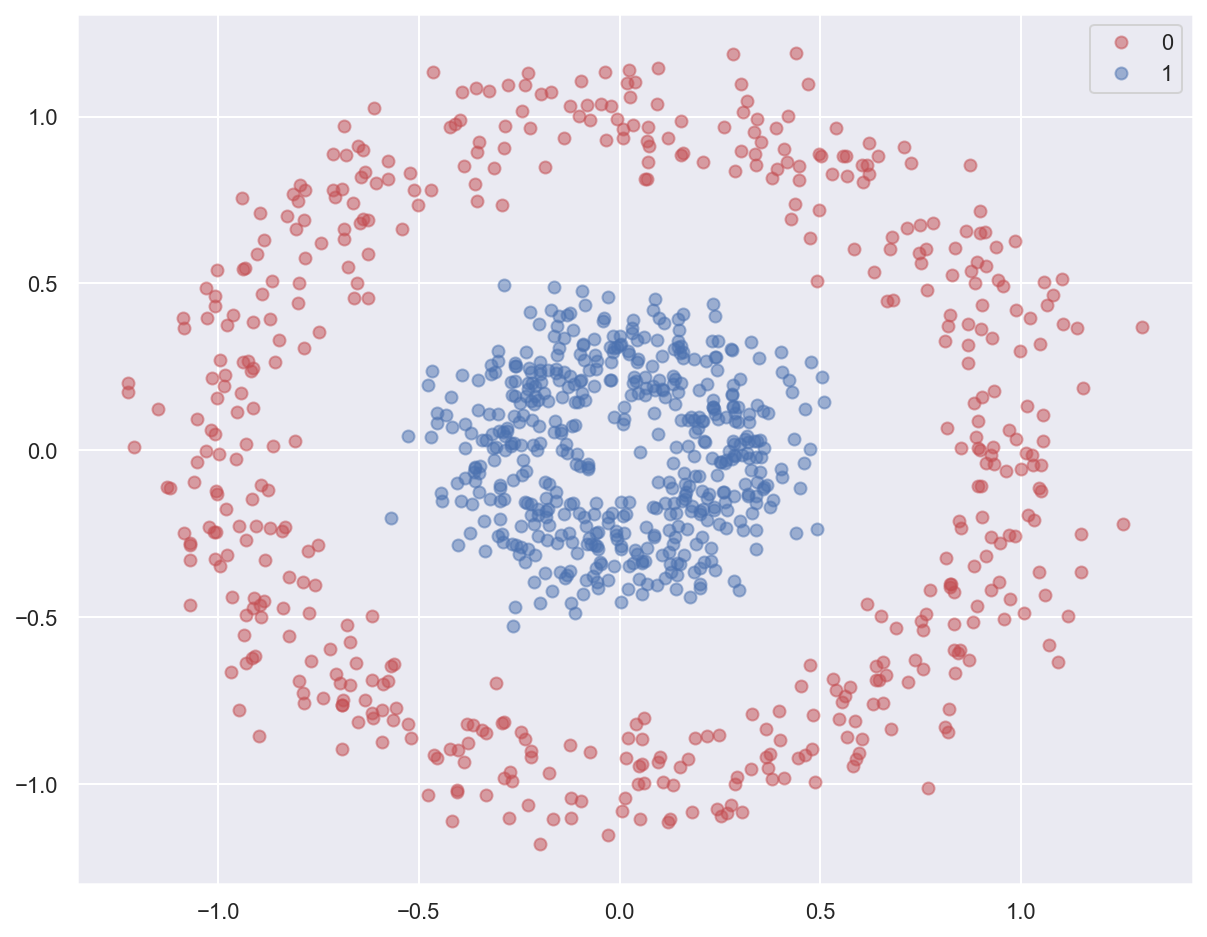

In [13]:
# Generate circle-shaped data
x_train, y_train = make_circles(n_samples=1000, noise=0.10, factor=0.3, random_state=0)

print(f"x_train: {x_train.shape}. y_train: {y_train.shape}")
plot_planar_data(x_train, y_train)

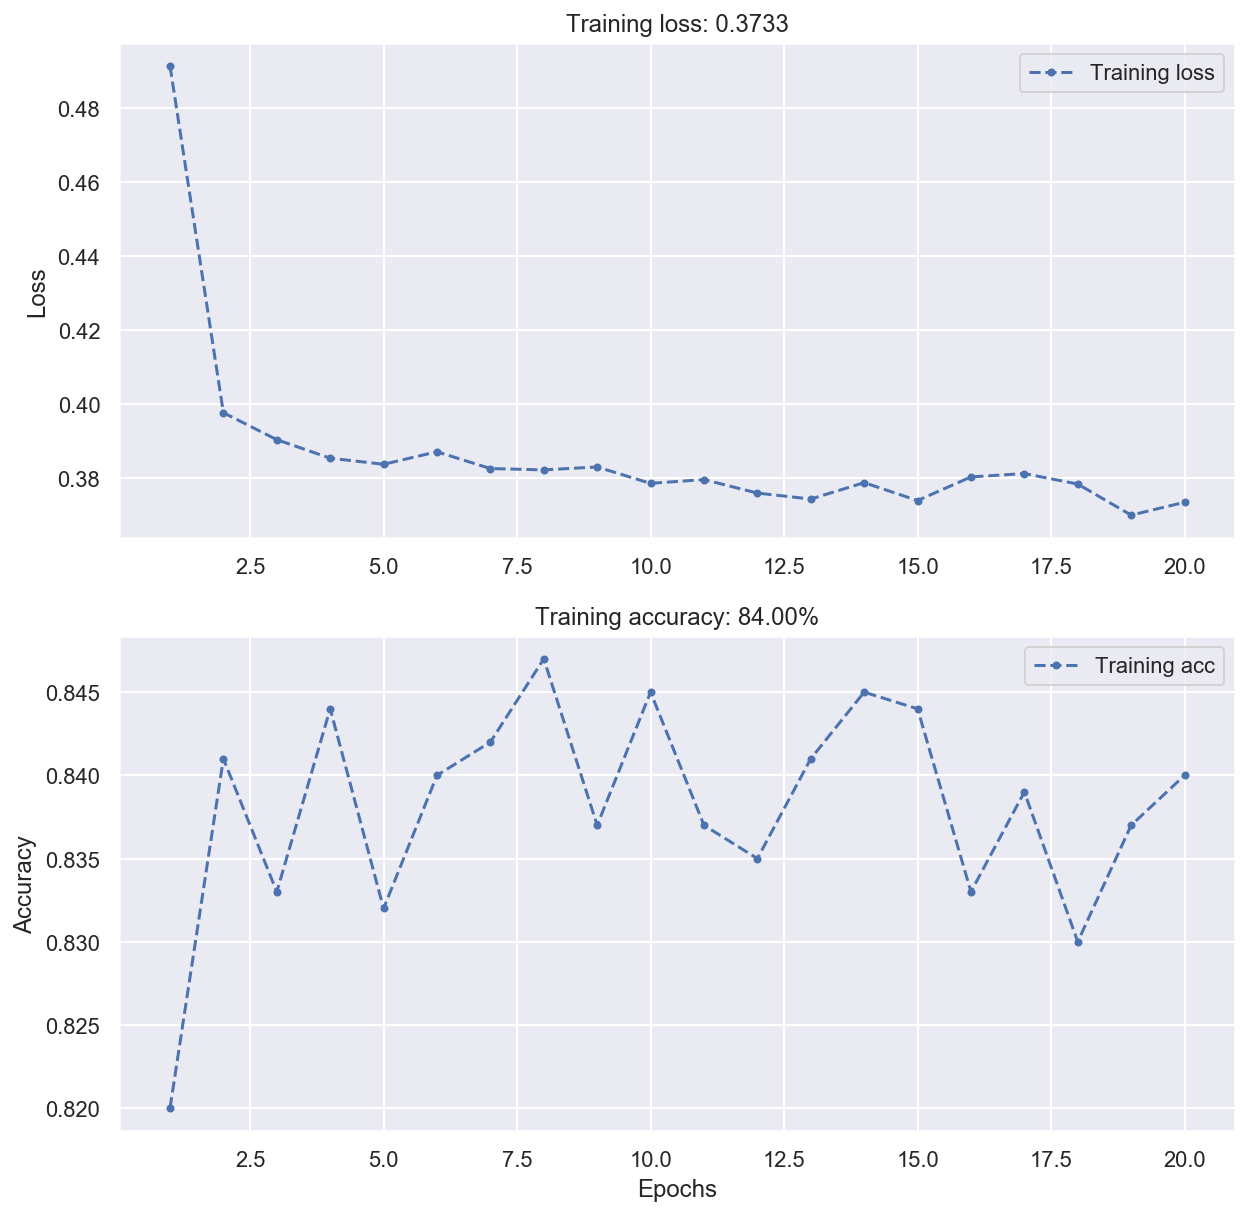

In [14]:
# Train the previous model on the data
history = model.fit(x_train, y_train, verbose=0, epochs=20)

# Show training results
plot_loss_acc(history)

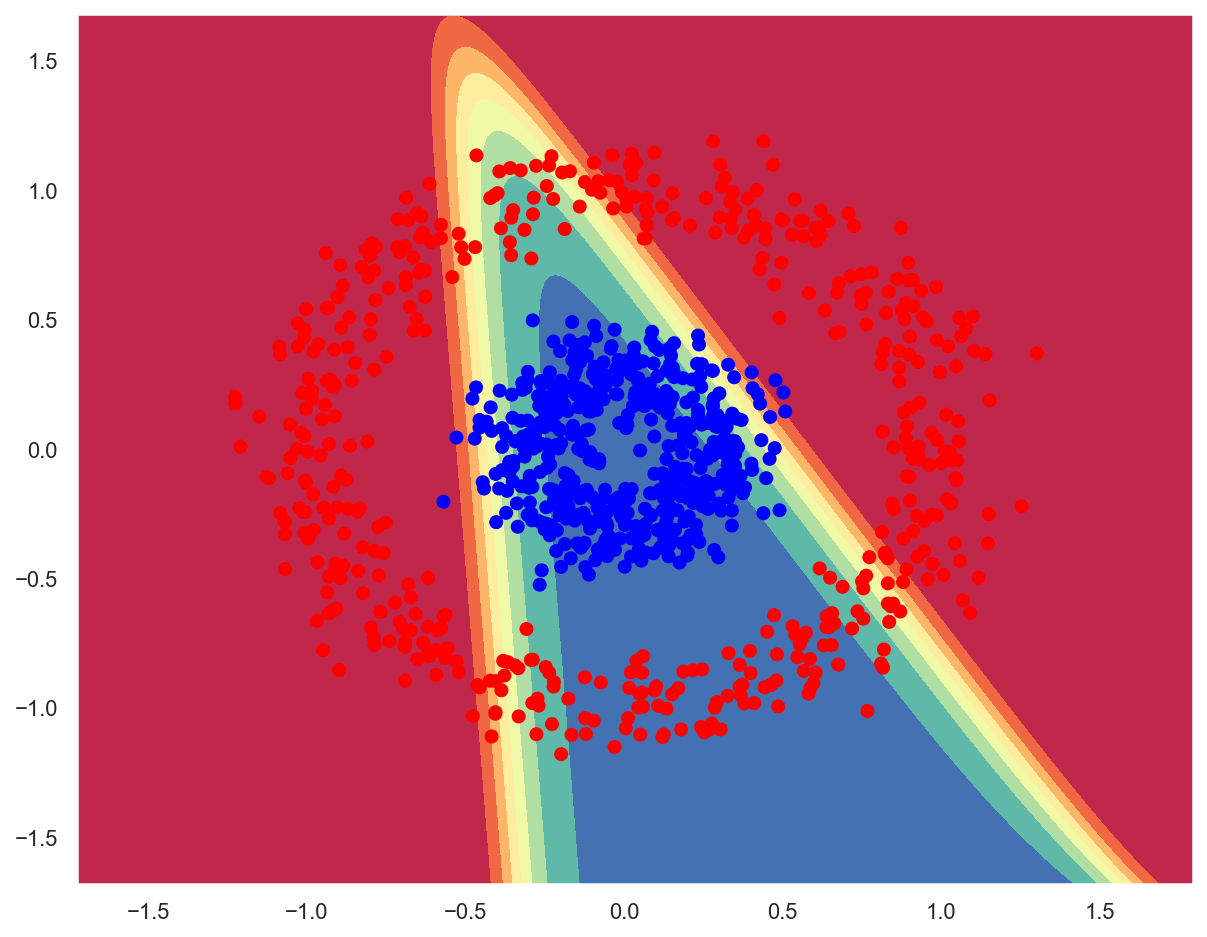

In [15]:
plot_decision_boundary(lambda x: model.predict(x), x_train, y_train)

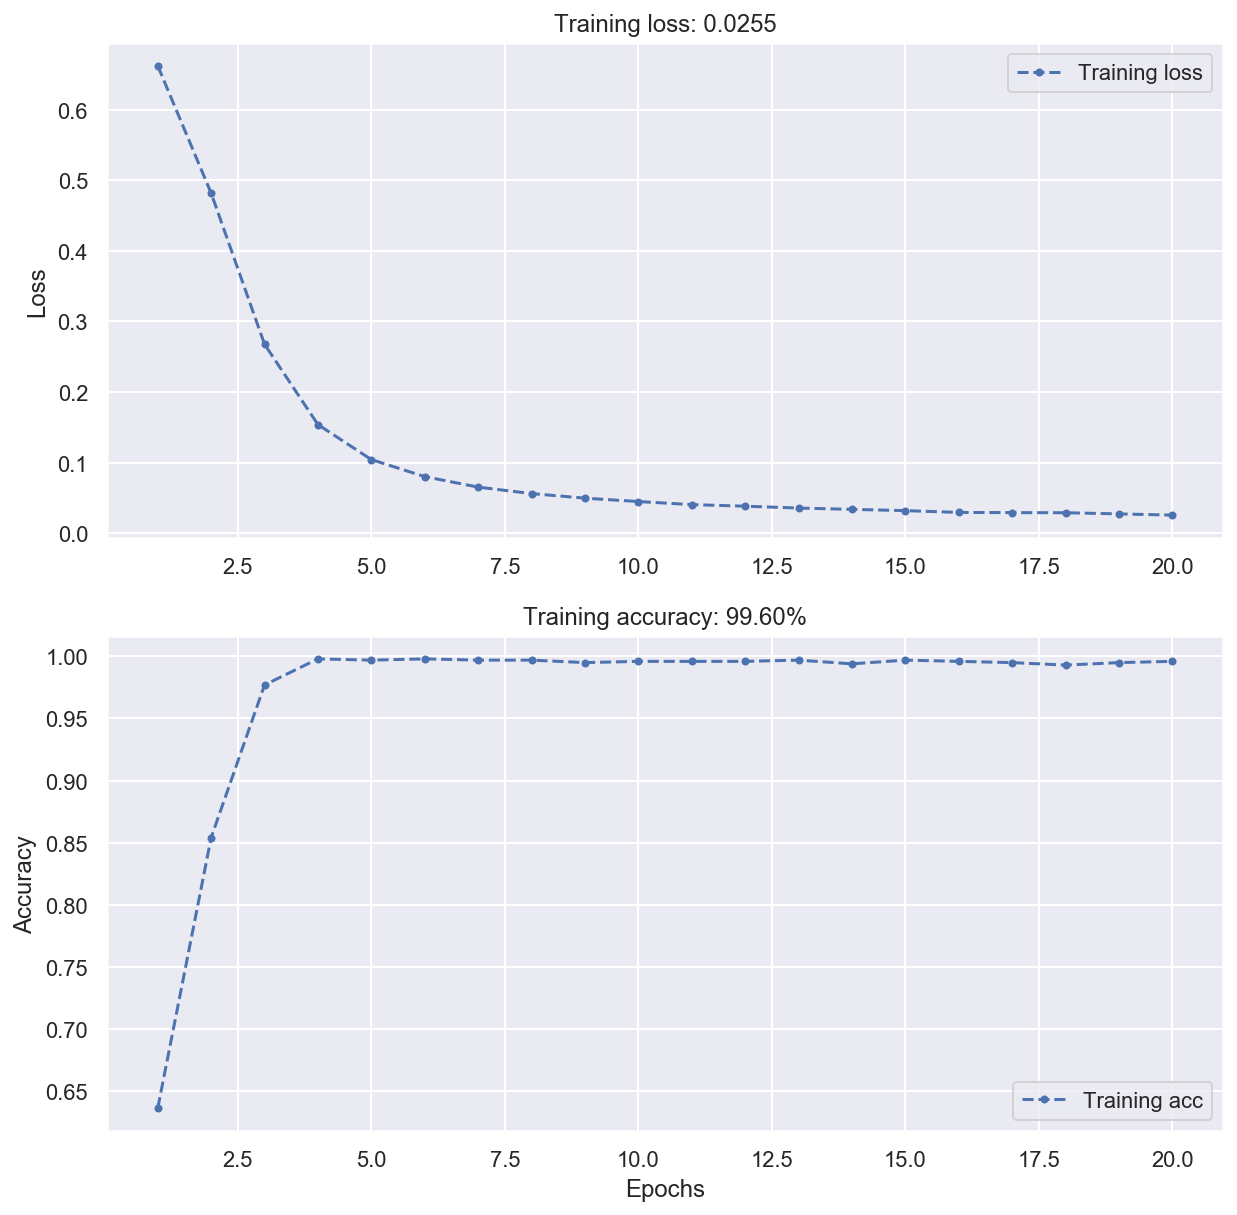

In [16]:
# Add a neuron on the hidden layer for better results
model = Sequential()
model.add(Dense(4, activation="tanh", input_shape=(2,)))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(SGD(lr=1.0), "binary_crossentropy", metrics=["accuracy"])

# Train the model on the data
history = model.fit(x_train, y_train, verbose=0, epochs=20)

# Show training results
plot_loss_acc(history)

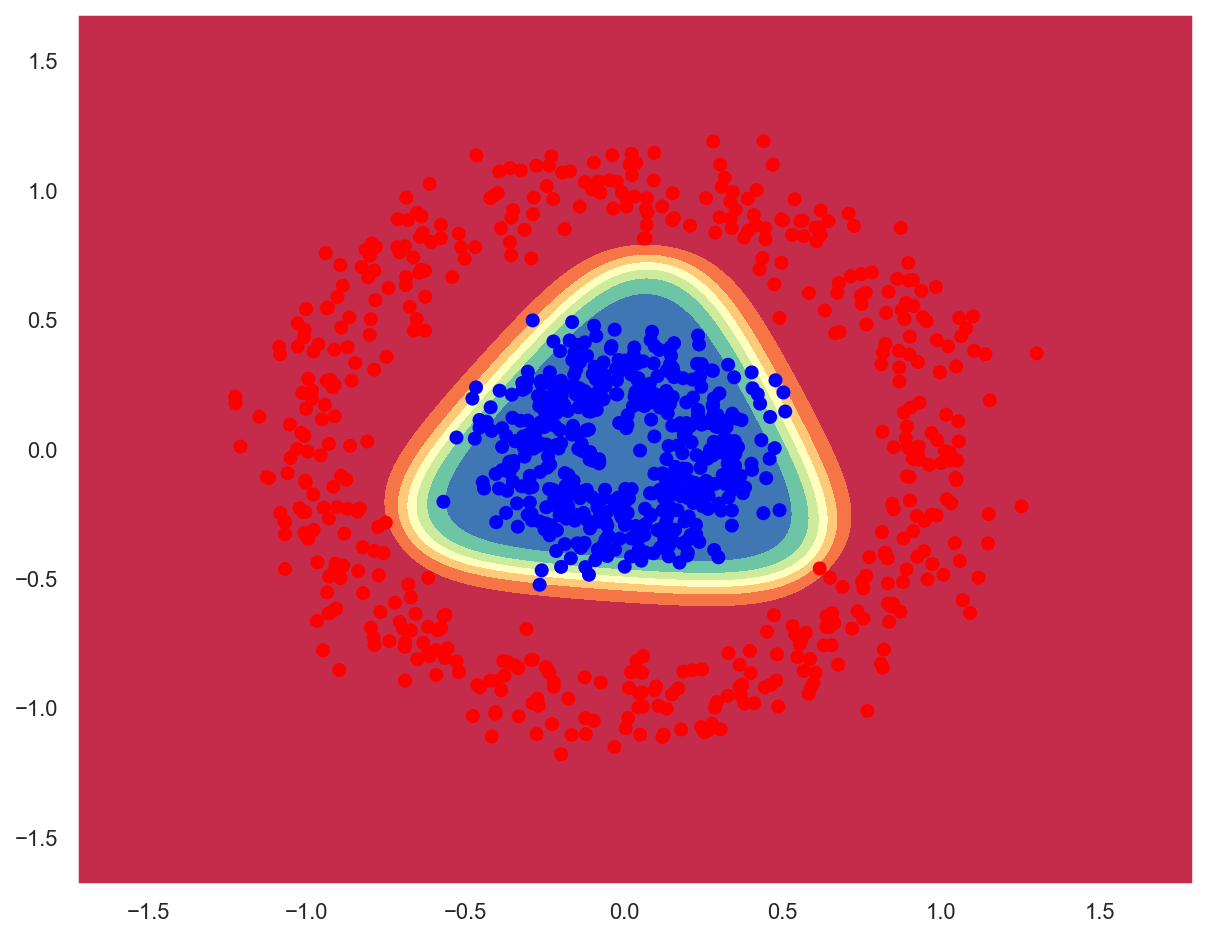

In [17]:
plot_decision_boundary(lambda x: model.predict(x), x_train, y_train)

### Example: training a multiclass classifier to recognize handwritten digits

The MNIST digits dataset contains 70,000 handwritten digits, stored as 28x28 grayscale images.

Once challenging for ML model, it's now the "Hello World" of Computer Vision.

In [18]:
# Load the Keras MNIST digits dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f"Training images: {train_images.shape}. Training labels: {train_labels.shape}")
print(f"Test images: {test_images.shape}. Test labels: {test_labels.shape}")

Training images: (60000, 28, 28). Training labels: (60000,)
Test images: (10000, 28, 28). Test labels: (10000,)


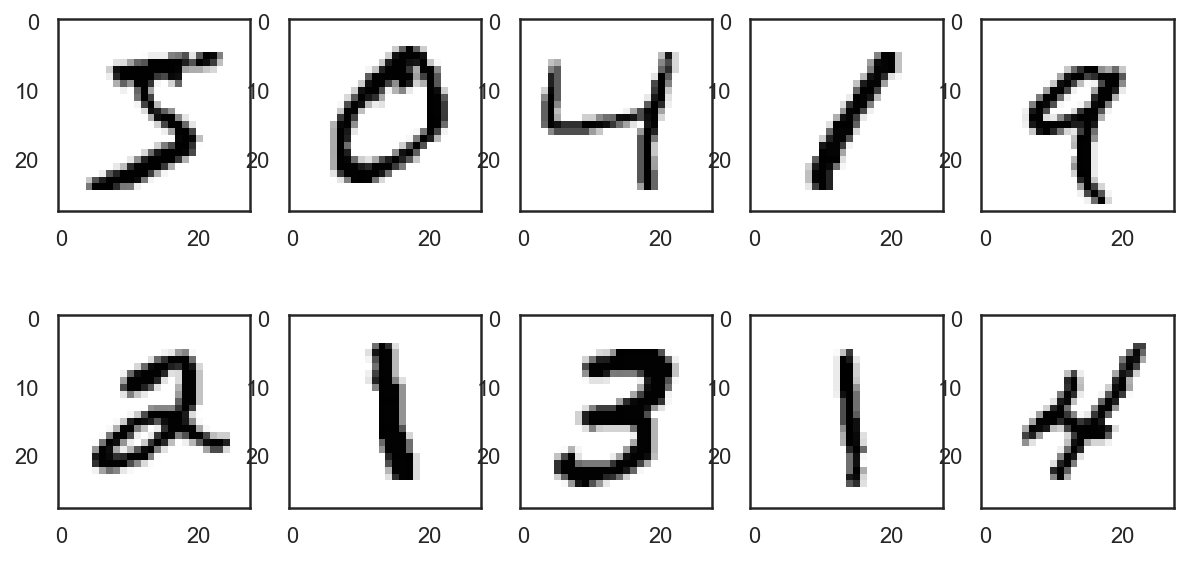

In [19]:
# Plot the first 10 digits
with sns.axes_style("white"):  # Temporary hide Seaborn grid lines
    plt.figure(figsize=(10, 5))
    for i in range(10):
        digit = train_images[i]
        fig = plt.subplot(2, 5, i + 1)
        plt.imshow(digit, cmap=plt.cm.binary)

In [20]:
# Labels are integer scalars between 0 and 9
df_train_labels = pd.DataFrame(train_labels)
df_train_labels.columns = {"digit"}
df_train_labels.sample(n=8)

,digit
16604,6
9959,3
25955,3
54470,5
27926,9
29644,6
55711,9
40335,0


#### Data preprocessing

In [21]:
# Change pixel values from (0, 255) to (0, 1)
x_train = train_images.astype("float32") / 255
x_test = test_images.astype("float32") / 255

In [22]:
# One-hot encoding of expected results
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Show a sample of encoded input
df_y_train = pd.DataFrame(y_train)
df_y_train.sample(n=8)

y_train: (60000, 10)
y_test: (10000, 10)


,0,1,2,3,4,5,6,7,8,9
22699,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
46200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26365,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
47455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
37164,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2034,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### Network architecture for MNIST

[![Extract from the book Neural Networks and Deep Learning by M. Nielsen](images/mnist_nn.png)](http://neuralnetworksanddeeplearning.com/chap1.html)

In [23]:
# Create the nn model
model = Sequential()
# The 28x28 images are flattened into a vector of 28*28 elements
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(15, activation="relu"))
# The softmax function creates a probability distribution
model.add(Dense(10, activation="softmax"))

# Describe the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


#### The softmax function

$$\sigma(z_j) = \frac{e^{z_j}}{\sum_{k=1}^K {e^{z_k}}}$$

- Probability distribution for $K$ classes.
- Output is a probability vector.

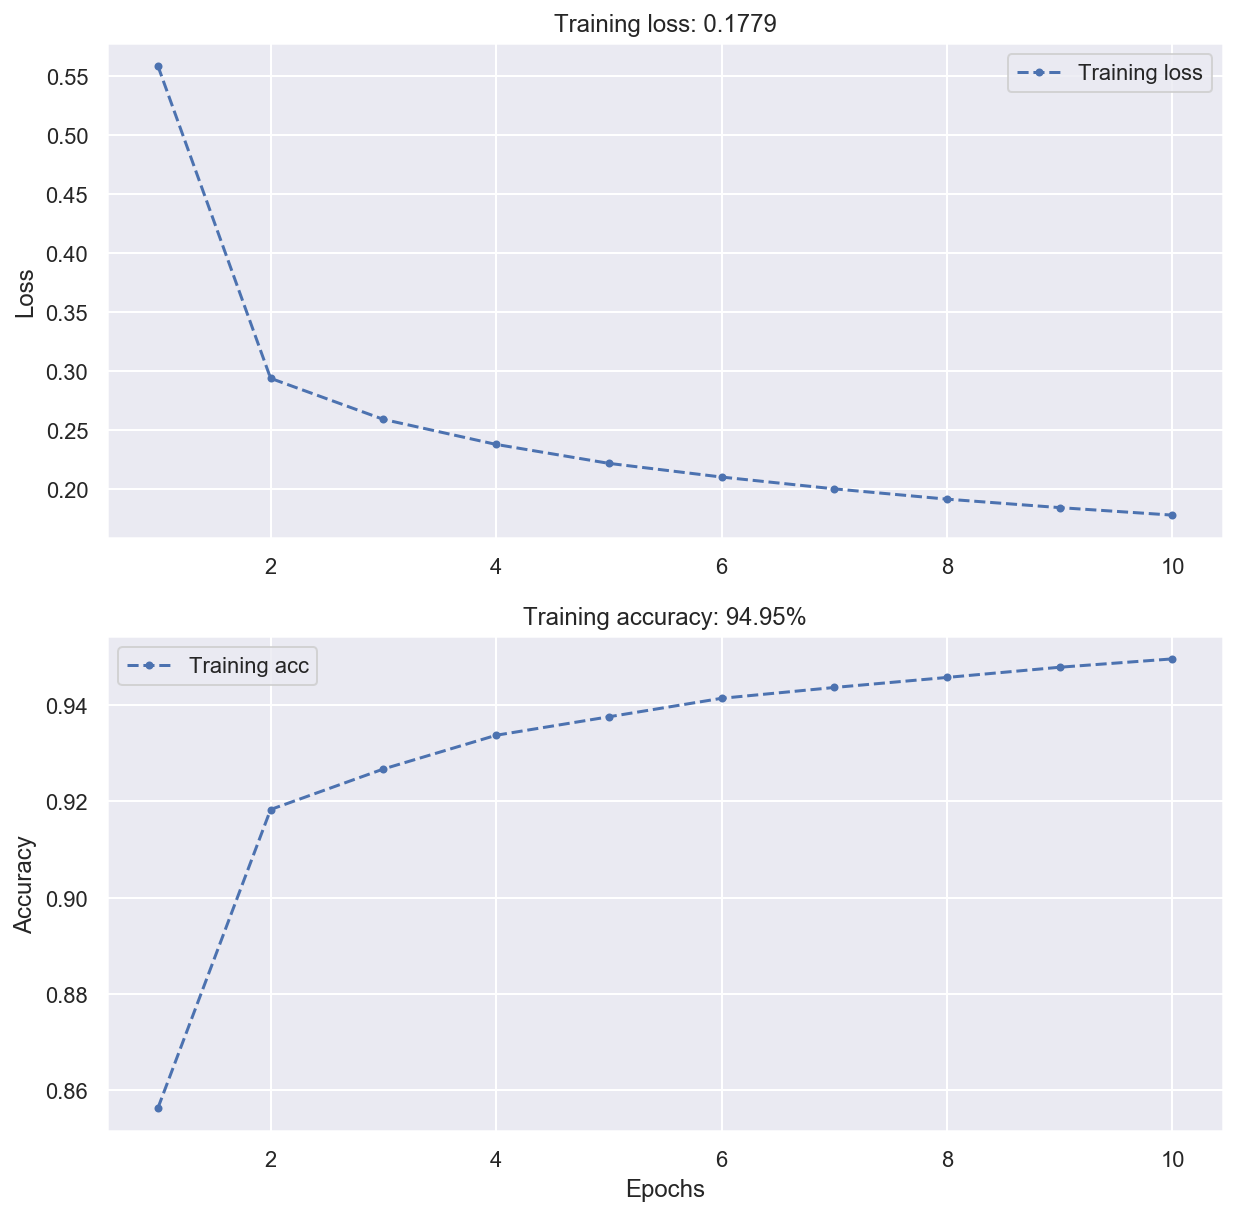

In [24]:
# Train the model and show results
model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

history = model.fit(x_train, y_train, verbose=0, epochs=10, batch_size=128)
plot_loss_acc(history)

In [25]:
# Evaluate the model on test data
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Test accuracy: {test_acc:.5f}")

Test accuracy: 0.94530


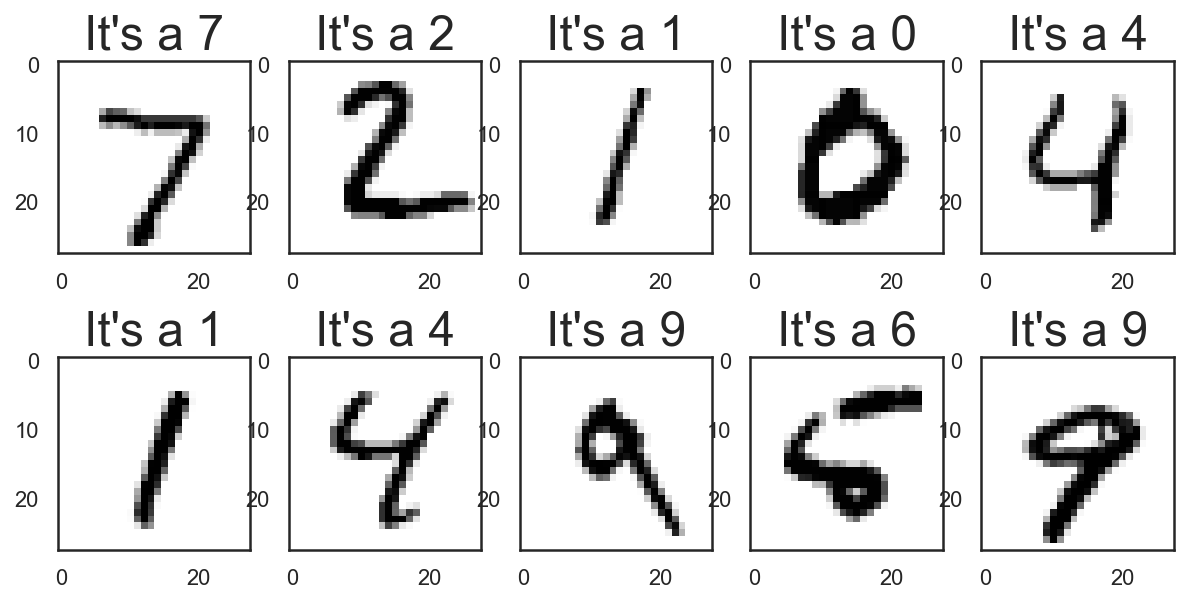

In [26]:
# Plot the first 10 test digits with associated predictions

# Temporary hide Seaborn grid lines
with sns.axes_style("white"):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        digit = test_images[i]
        prediction = np.argmax(model.predict(digit.reshape((1, 28, 28))))
        fig = plt.subplot(2, 5, i + 1)
        plt.title("It's a {:d}".format(prediction), fontsize=24)
        plt.imshow(digit, cmap=plt.cm.binary)

In [27]:
# Saving model for future use
model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")

## Tuning neural networks

### Hyperparameters choice

- Number of layers
- Number of neurons on hidden layers
- Activation functions
- Learning rate
- Mini-batch size
- ...

### Gradient descent optimization

[![Gradient Descent evolution map](images/gradient_descent_evolution_map.png)](https://towardsdatascience.com/10-gradient-descent-optimisation-algorithms-86989510b5e9)

#### Momentum

Momentum optimization accelerates the descent speed in the direction of the minimum by accumulating previous gradients.

It can also escape plateaux faster then plain GD.

$$\pmb{m_{next}} = \beta \pmb{m} - \eta\nabla_{\boldsymbol{\theta}}\mathcal{L}(\boldsymbol{\theta})$$

$$\pmb{\theta_{next}} = \pmb{\theta} + \pmb{m_{next}}$$

$\beta \in [0,1]$ prevents gradients updates from growing too large. A typical value for $\beta$ is 0.9.

#### RMSprop

RMSprop decays the learning rate differently for each parameter.

#### Other techniques

- **RMSprop** (*Root Mean Square Prop*) : use the previous gradients to update the _learning rate_.
- **Adam** (*Adaptive Moment Estimation*) : combines Momentum and RMSprop

[An overview of gradient descent optimization algorithms](http://ruder.io/optimizing-gradient-descent/)

### The optimization/generalization dilemna

- Tackle underfitting:
  - Use a more complex network
  - Train the network longer

- Tackle overfitting:
  - Use more training data
  - Limit the network size
  - Introduce regularization
  - Introduce dropout

### Observing underfitting and overfitting

(Inspired by the article [Implementing a Neural Network from Scratch](http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/))

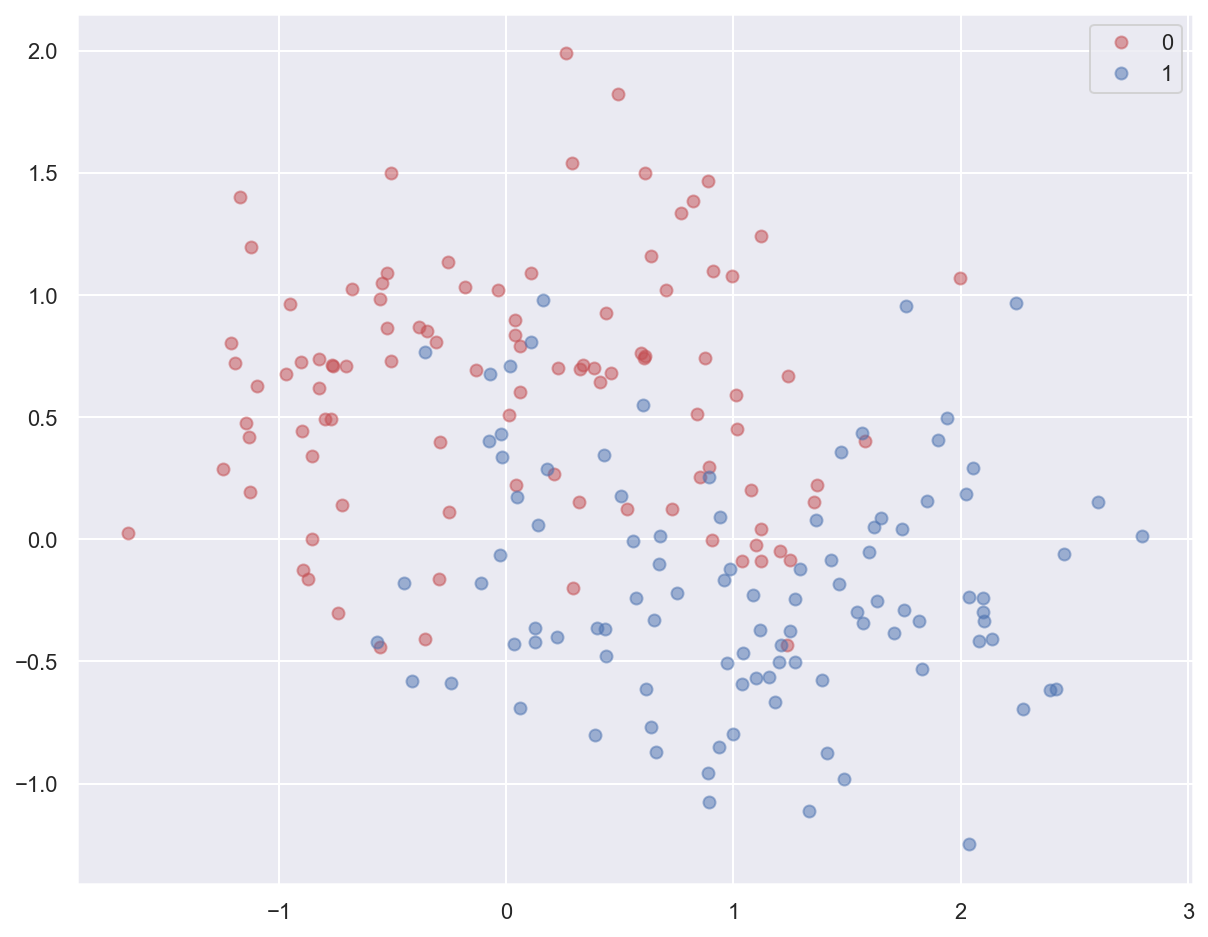

In [28]:
# Generate moon-shaped data with some noise
x_train, y_train = make_moons(200, noise=0.40)

plot_planar_data(x_train, y_train)

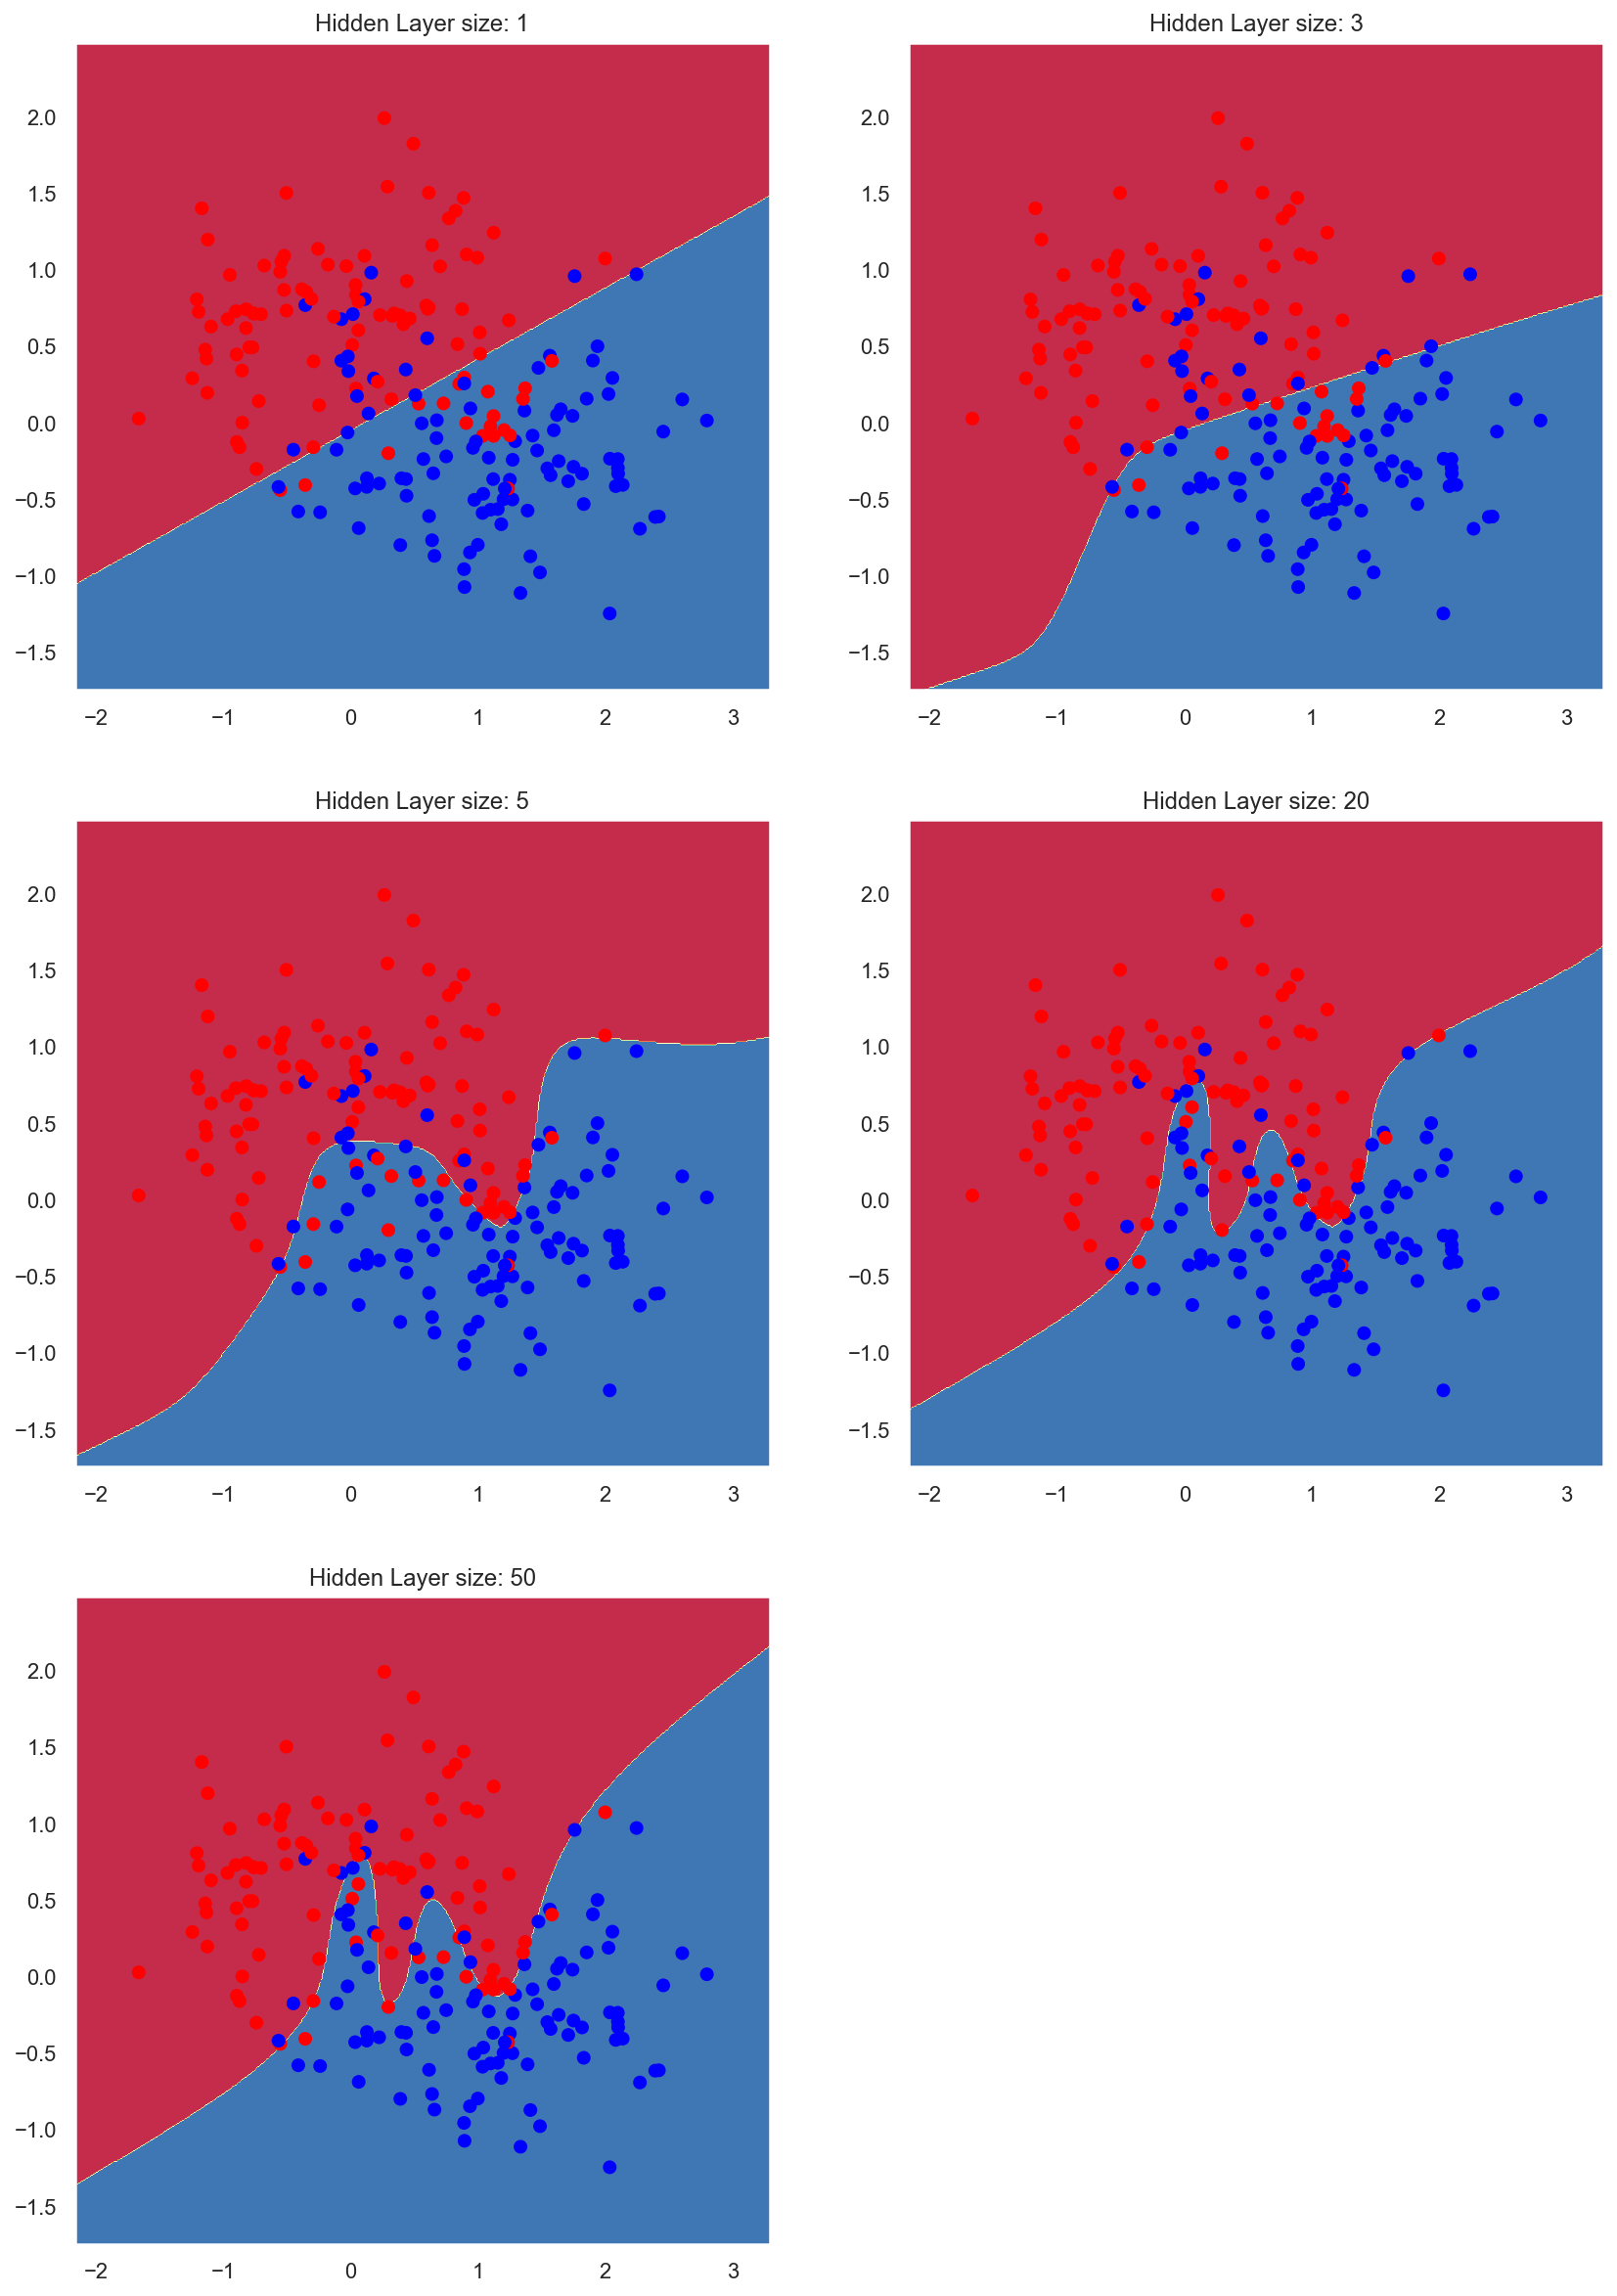

In [29]:
# Varying the hidden layer size to observe underfitting and overfitting

plt.figure(figsize=(14, 28))
hidden_layer_dimensions = [1, 3, 5, 20, 50]
for i, hidden_layer_size in enumerate(hidden_layer_dimensions):
    fig = plt.subplot(4, 2, i + 1)
    plt.title("Hidden Layer size: {:d}".format(hidden_layer_size))

    model = Sequential()
    model.add(Dense(hidden_layer_size, activation="tanh", input_shape=(2,)))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        optimizer=SGD(lr=1.0), loss="binary_crossentropy", metrics=["accuracy"]
    )

    # Batch size = dataset size => batch gradient descent
    history = model.fit(
        x_train, y_train, verbose=0, epochs=5000, batch_size=x_train.shape[0]
    )

    plot_decision_boundary(lambda x: model.predict(x) > 0.5, x_train, y_train, fig)

### Tackling overfitting

#### Regularization

Limit weights values by adding a penalty to the loss function.

$$\mathcal{l1} = \frac{\lambda}{m} {\sum |{\mathbf{\theta}_{ij}}|}\;\;\;\;
\mathcal{l2} = \frac{2\lambda}{m} {\sum {\mathbf{\theta}_{ij}}^2}$$

$\lambda$ is called the **regularization rate**.

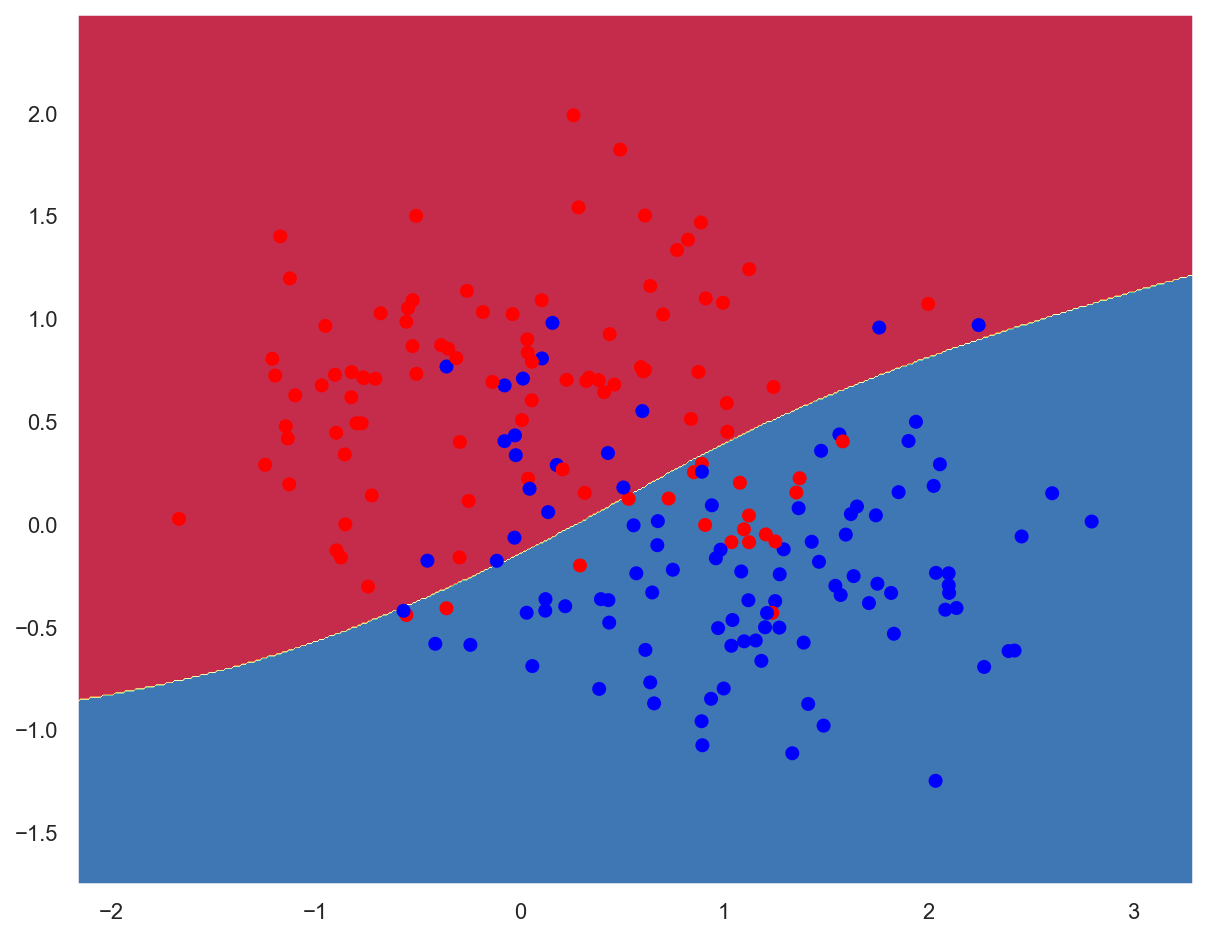

In [30]:
model = Sequential()

# Use L1 regularization on hidden layer
model.add(
    Dense(
        50,
        activation="tanh",
        input_shape=(2,),
        kernel_regularizer=regularizers.l1(0.001),
    )
)
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=SGD(lr=1.0), loss="binary_crossentropy", metrics=["accuracy"])

# Batch size = dataset size => batch gradient descent
history = model.fit(
    x_train, y_train, verbose=0, epochs=5000, batch_size=x_train.shape[0]
)

plot_decision_boundary(lambda x: model.predict(x) > 0.5, x_train, y_train)

#### Dropout

During training, some input units are randomly set to 0. The network must adapt and become more generic. The more units dropped out, the stronger the regularization.

![Dropout](images/dropout.png)

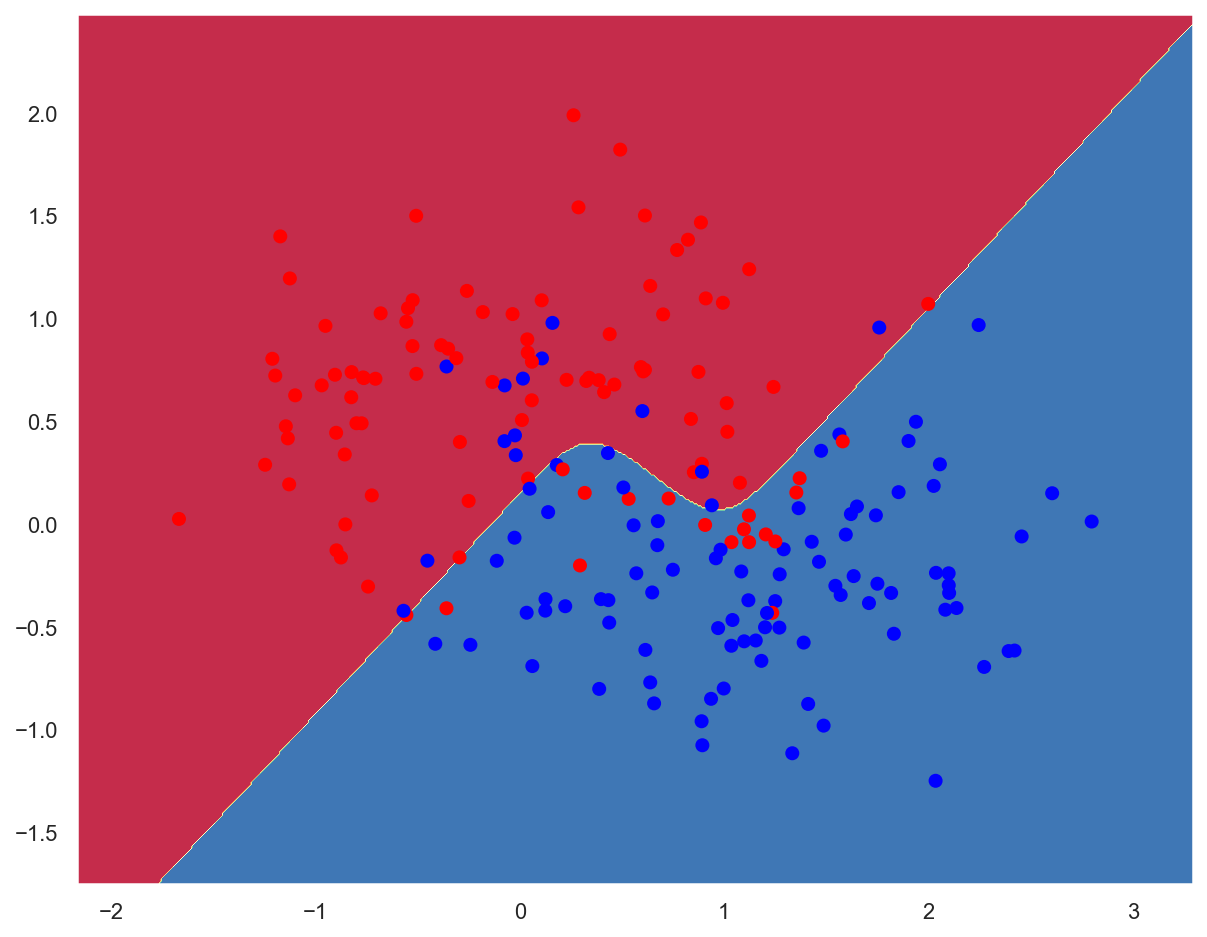

In [31]:
model = Sequential()

model.add(Dense(50, activation="tanh", input_shape=(2,)))
# Applies 25% dropout on previous layer
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=SGD(lr=1.0), loss="binary_crossentropy", metrics=["accuracy"])

# Batch size = dataset size => batch gradient descent
history = model.fit(
    x_train, y_train, verbose=0, epochs=5000, batch_size=x_train.shape[0]
)

plot_decision_boundary(lambda x: model.predict(x) > 0.5, x_train, y_train)

### Demo time!

Train a complete neural network on the [TensorFlow Playground](https://playground.tensorflow.org)

### Overfitting on a real-world example

(Heavily inspired by a use case in François Chollet's book [Deep Learning With Python](https://www.manning.com/books/deep-learning-with-python))

In [32]:
# Load the Keras IMDB dataset
# We only keep the top 10,000 most frequently occuring words in the training data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(f"Training data: {train_data.shape}. Training labels: {train_labels.shape}")

# Reviews are encoded as lists of word indexes
# Words are indexed by overall frequency in the dataset
print(f"First review: {train_data[0]}")

# Labels are binary integers: 0 for a negative review, 1 for a positive one
print(f"First label: {train_labels[0]}")

Training data: (25000,). Training labels: (25000,)
First review: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178,

In [33]:
# Show the first review as text

# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [34]:
# Preparation of data for training


def vectorize_sequences(sequences, dimension=10000):
    """One-hot encode a vector of sequences into a binary matrix (number of sequences, dimension)"""

    # Example : [[3, 5]] -> [[0. 0. 0. 1. 0. 1. 0...]]

    results = np.zeros((len(sequences), dimension))
    # set specific indices of results[i] to 1s
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results


# Turn reviews into vectors of 0s and 1s (one-hot encoding)
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Set apart the first 10,000 reviews as validation data
x_val, x_train = x_train[:10000], x_train[10000:]
y_val, y_train = train_labels[:10000], train_labels[10000:]

y_test = test_labels

print(f"x_train: {x_train.shape}. x_val: {x_val.shape}")

x_train: (15000, 10000). x_val: (10000, 10000)


In [35]:
# Show a sample of encoded input
df_x_train = pd.DataFrame(x_train)
df_x_train.sample(n=10)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
1908,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11016,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11869,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12335,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12918,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1509,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
522,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14298,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13054,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6184,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Build a nn with two hidden layers to demonstrate overfitting
model = Sequential()
model.add(Dense(16, activation="relu", input_shape=(10000,)))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Show model info
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_21 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


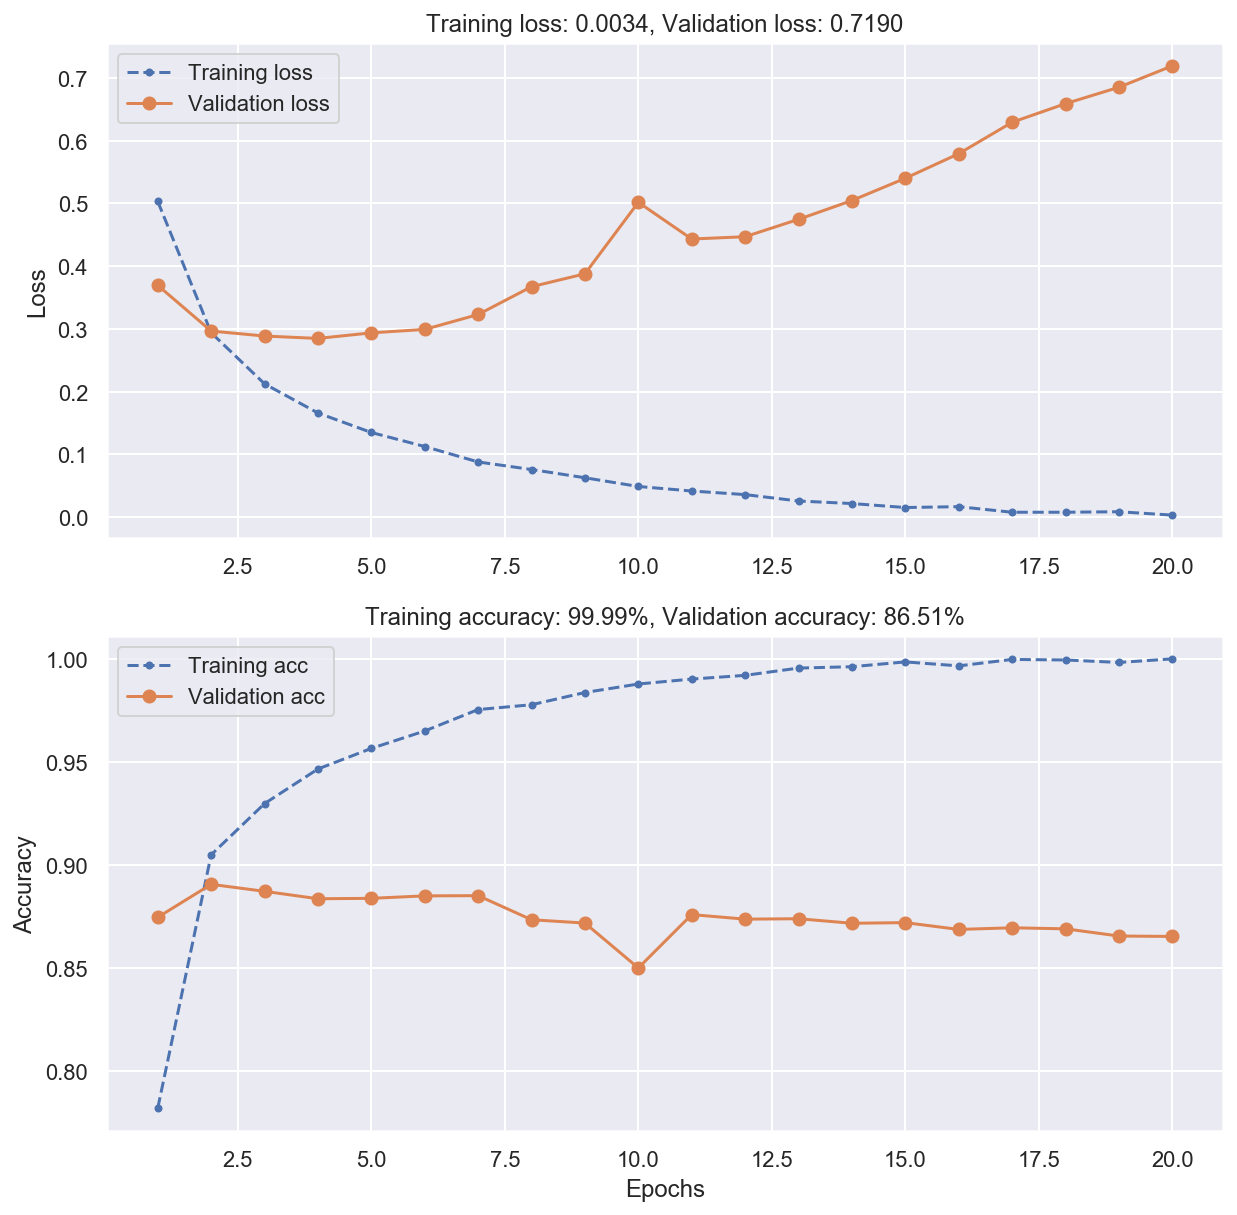

In [37]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# We also record validation history during training
history = model.fit(
    x_train, y_train, epochs=20, verbose=0, batch_size=512, validation_data=(x_val, y_val)
)
plot_loss_acc(history)

In [38]:
# Evaluate model performance on test data
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Test accuracy: {test_acc:.5f}")

Test accuracy: 0.84996


#### Reducing network size

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 8)                 80008     
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 9         
Total params: 80,089
Trainable params: 80,089
Non-trainable params: 0
_________________________________________________________________


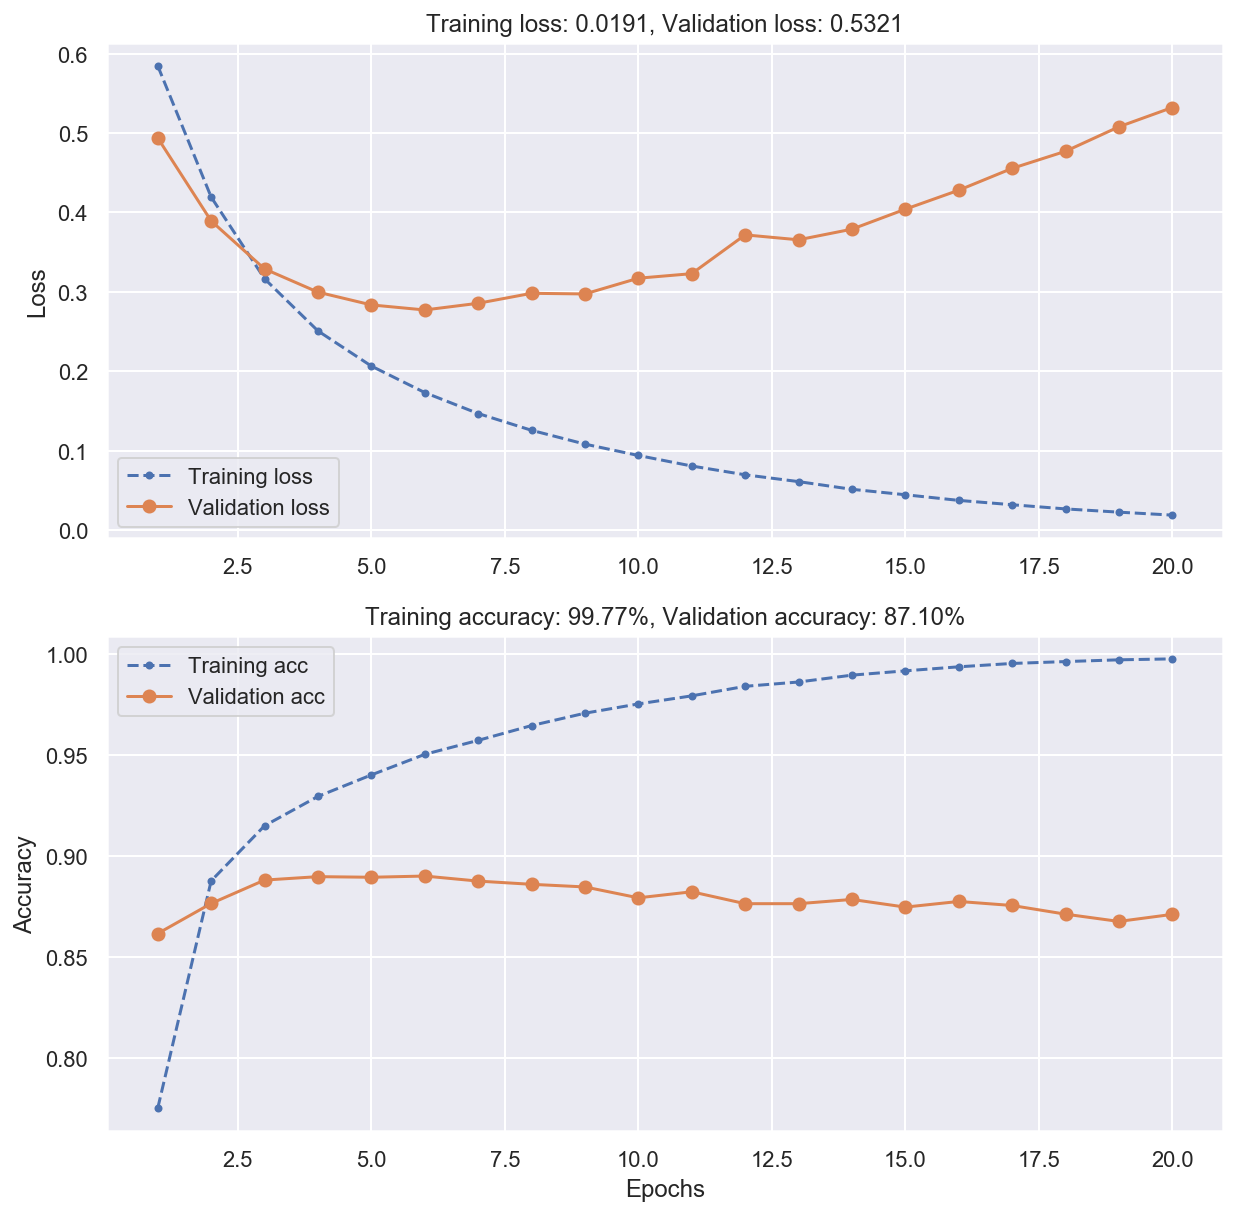

In [39]:
# Build and train a smaller network
model = Sequential()
model.add(Dense(8, activation="relu", input_shape=(10000,)))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Show model info to check the new number of parameters
model.summary()

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(
    x_train, y_train, epochs=20, verbose=0, batch_size=512, validation_data=(x_val, y_val)
)
plot_loss_acc(history)

#### Regularization

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 8)                 80008     
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 9         
Total params: 80,089
Trainable params: 80,089
Non-trainable params: 0
_________________________________________________________________


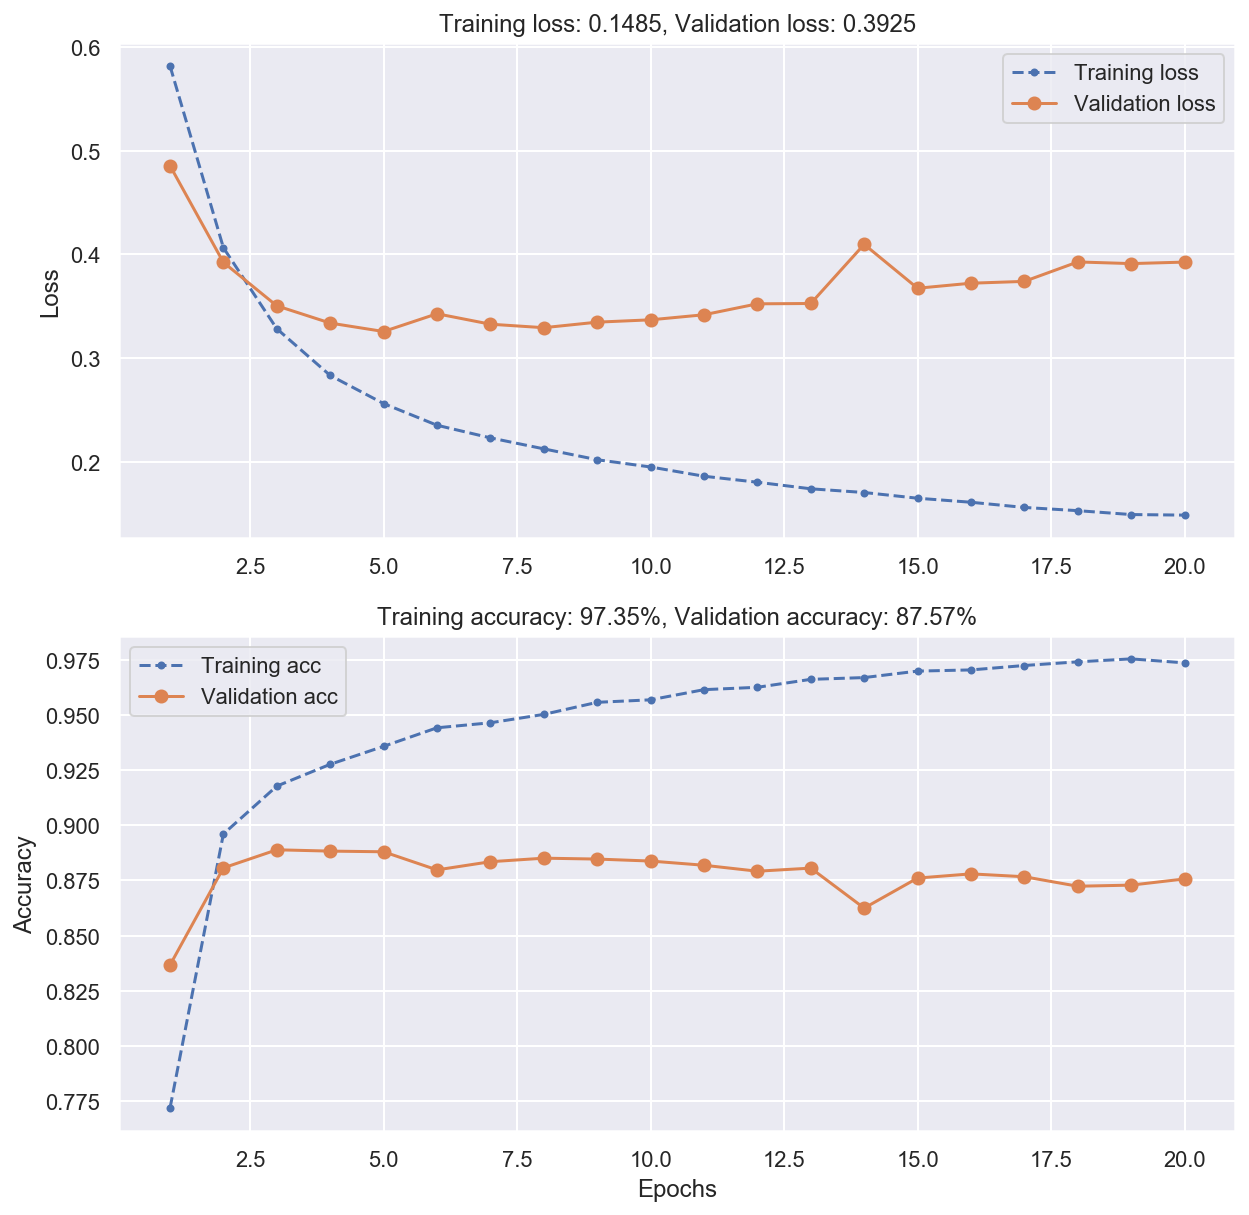

In [40]:
# Create the same model as before but now using L2 regularization
model = Sequential()
model.add(
    Dense(
        8,
        activation="relu",
        input_shape=(10000,),
        kernel_regularizer=regularizers.l2(0.001),
    )
)
model.add(Dense(8, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation="sigmoid"))

# Show model info
model.summary()

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(
    x_train, y_train, epochs=20, verbose=0, batch_size=512, validation_data=(x_val, y_val)
)
plot_loss_acc(history)

#### Dropout

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 8)                 80008     
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_30 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 9         
Total params: 80,089
Trainable params: 80,089
Non-trainable params: 0
_________________________________________________________________


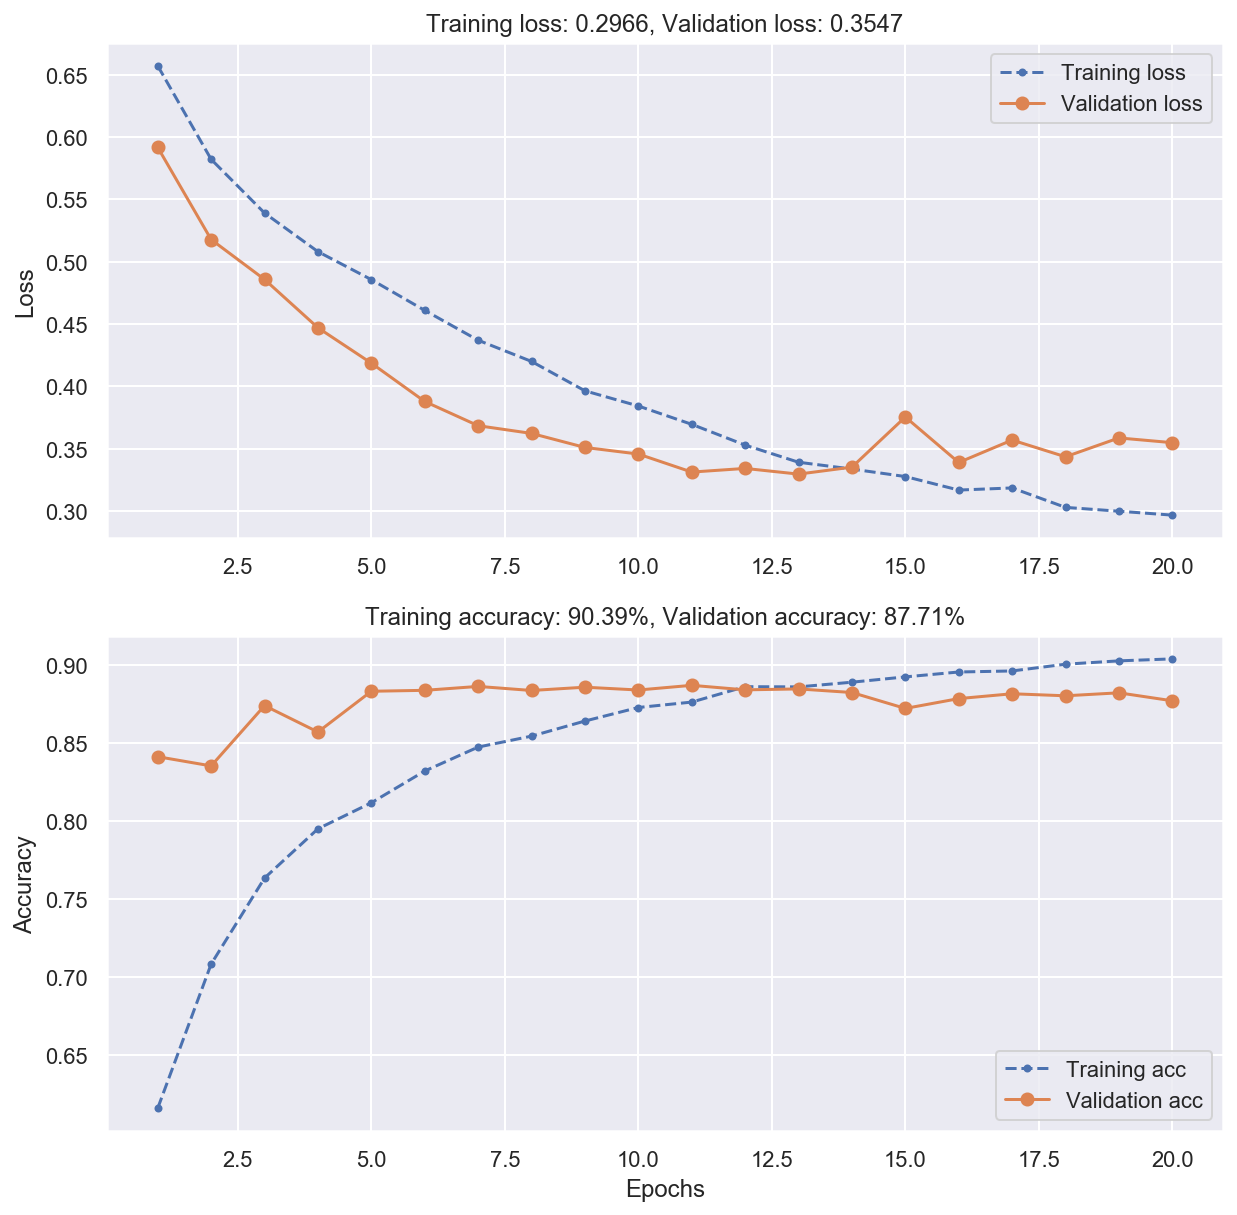

In [41]:
# Add 50% dropout to the two hidden layers
model = Sequential()
model.add(
    Dense(
        8,
        activation="relu",
        input_shape=(10000,),
        kernel_regularizer=regularizers.l2(0.001),
    )
)
model.add(Dropout(0.5))
model.add(Dense(8, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

# Show model info
model.summary()

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(
    x_train, y_train, epochs=20, verbose=0, batch_size=512, validation_data=(x_val, y_val)
)
plot_loss_acc(history)

In [42]:
# Evaluate tuned model performance on test data
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Test accuracy: {test_acc:.5f}")

Test accuracy: 0.87104
